In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [27]:
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

In [28]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [29]:
train.head() #2011-01-01 00:00:00
#년, 월, 일 각각 추출

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
year=train["datetime"].str.split("-").str[0]
month=train["datetime"].str.split("-").str[1]
day=train["datetime"].str.split("-").str[2].str.split(" ").str[0]

# train.datetime.astype('datetime64').dt.year
# train.datetime.astype('datetime64').dt.month
# train.datetime.astype('datetime64').dt.day

# train['datetime'].apply(lambda x: x.split('-')[0])
# train['datetime'].apply(lambda x: x.split('-')[1])
# train['datetime'].apply(lambda x: x.split('-')[2][:2])

In [31]:
# df=pd.read_csv("bike-sharing-demand/train.csv", parse_dates=['datetime'])
# df.info()
# df['datetime'].dt.year

In [33]:
# df['datetime'].dt.day

In [34]:
train['tempDate']=train.datetime.apply(lambda x:x.split())

In [35]:
# train['tempDate']

In [36]:
train['year']=train.tempDate.apply(lambda x : x[0].split("-")[0])
train['month']=train.tempDate.apply(lambda x : x[0].split("-")[1])
train['day']=train.tempDate.apply(lambda x : x[0].split("-")[2])

In [37]:
list(calendar.day_name)

['Montag',
 'Dienstag',
 'Mittwoch',
 'Donnerstag',
 'Freitag',
 'Samstag',
 'Sonntag']

In [38]:
list(calendar.day_abbr)#축약형

['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

In [39]:
calendar.day_name[1]

'Dienstag'

In [40]:
import locale #지역설정

In [66]:
locale.setlocale(locale.LC_ALL, "english") #지역을 우리나라로 설정

'English_United States.1252'

In [67]:
list(calendar.day_name) #우리나라로 설정해줬기때문에 데이네임이 우리나라형식으로

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [68]:
list(calendar.day_name)[s.dt.weekday.iloc[0]]

'Friday'

In [65]:
datetime.today()

datetime.datetime(2023, 10, 20, 11, 7, 17, 32482)

In [58]:
s = pd.Series(pd.date_range("2023-10-20", periods=10,freq="D")) #데이를 기준으로 100일동안 날짜
s.dt.weekday.iloc[0]

4

In [46]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [47]:
s.dt.strftime("%Y년 %m월 %d일") #날짜형식 -> 문자열
#strptime() : 문자열 -> 날짜형식
print(datetime.strptime("202310201053", "%Y%m%d%H%M"))
#strptime()
# %Y : 4자리 수 year
# %y : 2자리 수 year
# %m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)
# %d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)
# %H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)
# %M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)
# %S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)

2023-10-20 10:53:00


In [48]:
s.dt.year
s.dt.strftime("%Y년 %m월 %d일") #날짜형식 -> 문자열
#strptime() : 문자열 -> 날짜형식
print(datetime.strptime("202310201053", "%Y%m%d%H%M"))
"""
%Y : 4자리 수 year
%y : 2자리 수 year
%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)
%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)
%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)
%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)
%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)
"""

2023-10-20 10:53:00


'\n%Y : 4자리 수 year\n%y : 2자리 수 year\n%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)\n%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)\n%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)\n%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)\n%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)\n'

In [51]:
train
train['year']=pd.to_numeric(train.year)
train['month']=pd.to_numeric(train.month)
train['day']=pd.to_numeric(train.day)


In [52]:
train['hour']=train.tempDate.apply(lambda x : x[1].split(":")[0])

In [73]:
train['weekday']=train.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

In [77]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  object 
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(11), object(4)
memory usage: 1.5+ MB


In [78]:
train['hour']=pd.to_numeric(train.hour) #hour(object타입), Int타입으로

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [82]:
train = train.drop('tempDate', axis=1) #tempDate열 뽑을거 다뽑고 필요없어서 드랍

KeyError: "['tempDate'] not found in axis"

In [91]:
train.groupby('year')['count'].mean().reset_index() #연도별 자전거대여수 평균

,year,count
0,2011,144.223349
1,2012,238.560944


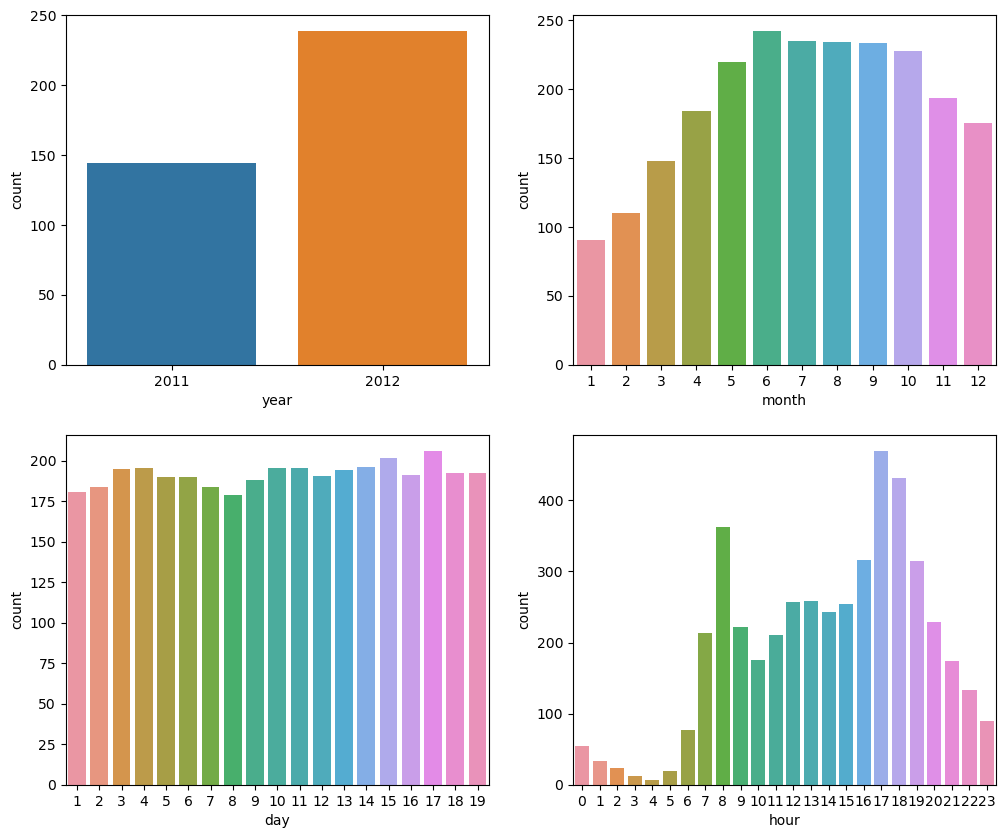

In [96]:
fig = plt.figure(figsize=[12, 10])

ax1 = fig.add_subplot(2,2,1) #두줄 두칸으로 나누고 왼쪽상단 첫번째
ax1 = sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())

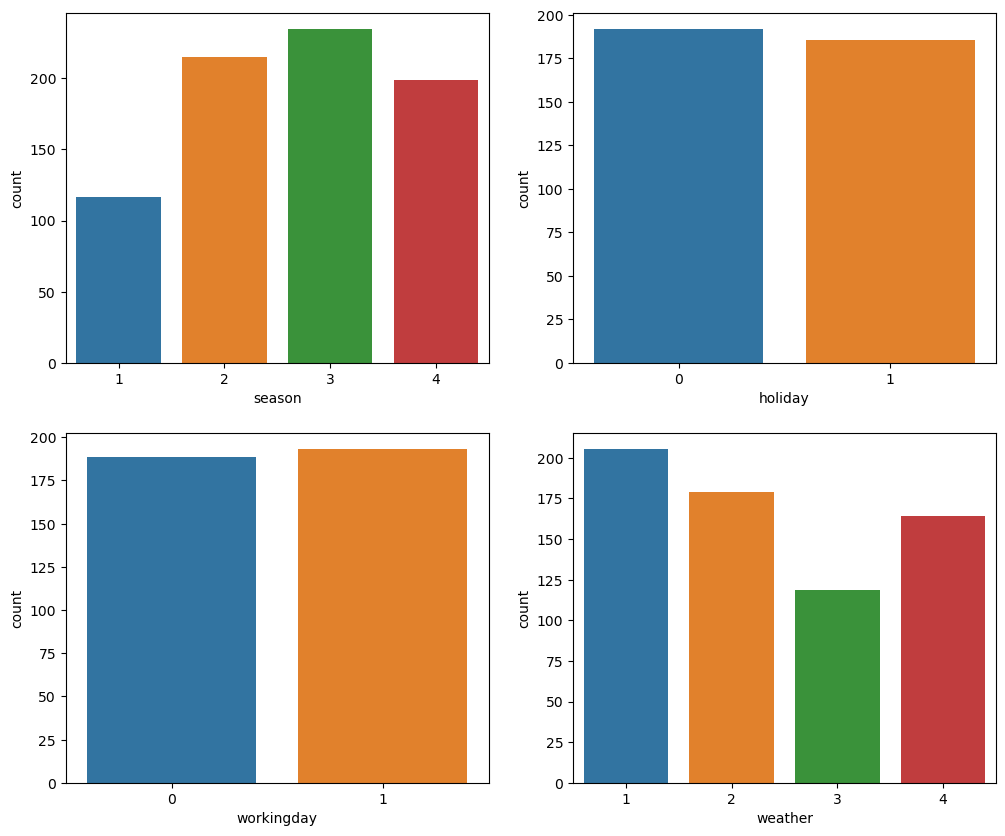

In [97]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())
ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())
ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())
ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

In [98]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [102]:
def newSeason(month):
    if month in [12,1,2]:
        return 4
    elif  month in [3,4,5]:
        return 1
    elif  month in [6,7,8]:
        return 2
    elif  month in [9,10,11]:
        return 3

In [103]:
train.month
train.season
# 봄(3,4,5월):1...겨울(12,1,2월):4
train['season'] = train.month.apply(newSeason)

In [104]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


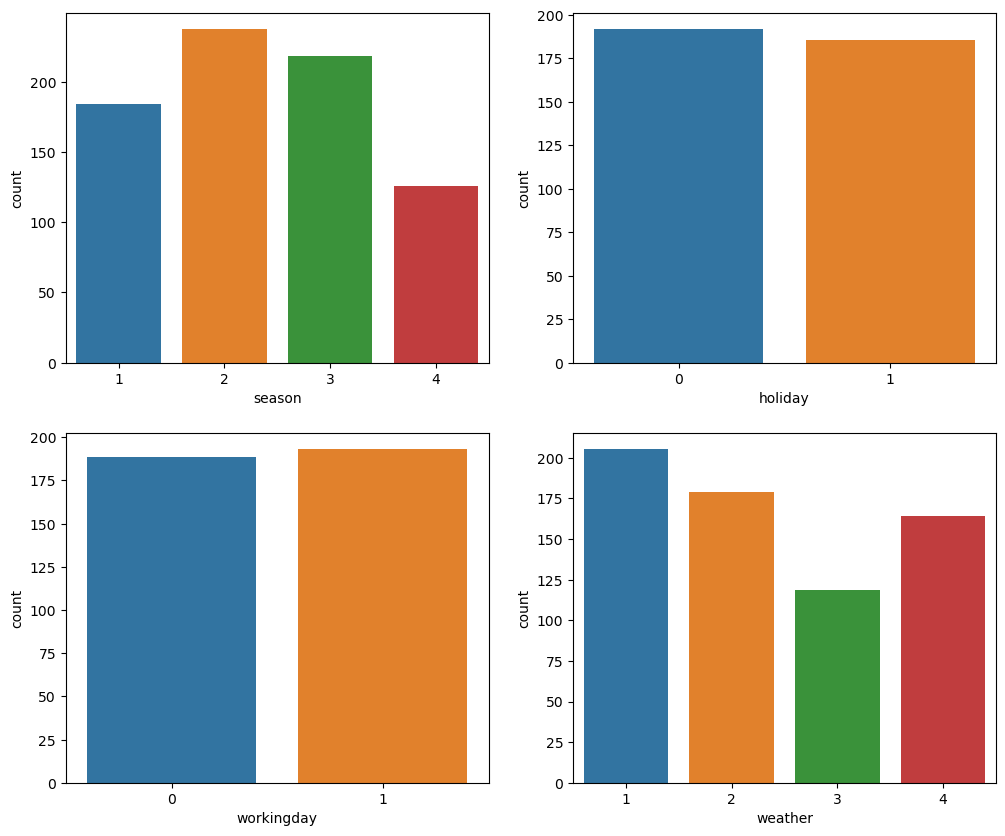

In [105]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())
ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())
ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())
ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

C:\Users\user\AppData\Local\Temp\ipykernel_3536\2086291599.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
C:\Users\user\AppData\Local\Temp\ipykernel_3536\2086291599.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.d

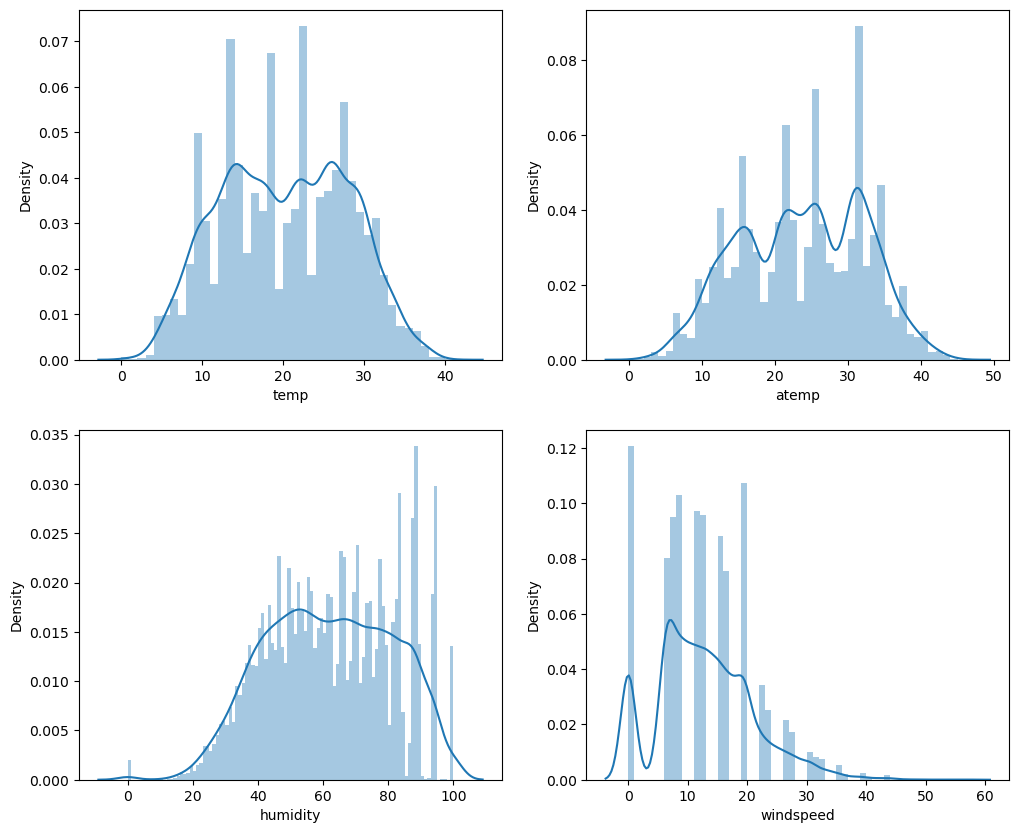

In [106]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(int(train.atemp.min()),int(train.atemp.max())+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(int(train.humidity.min()),int(train.humidity.max())+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

C:\Users\user\AppData\Local\Temp\ipykernel_3536\2152326737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, square=True)


<Axes: >

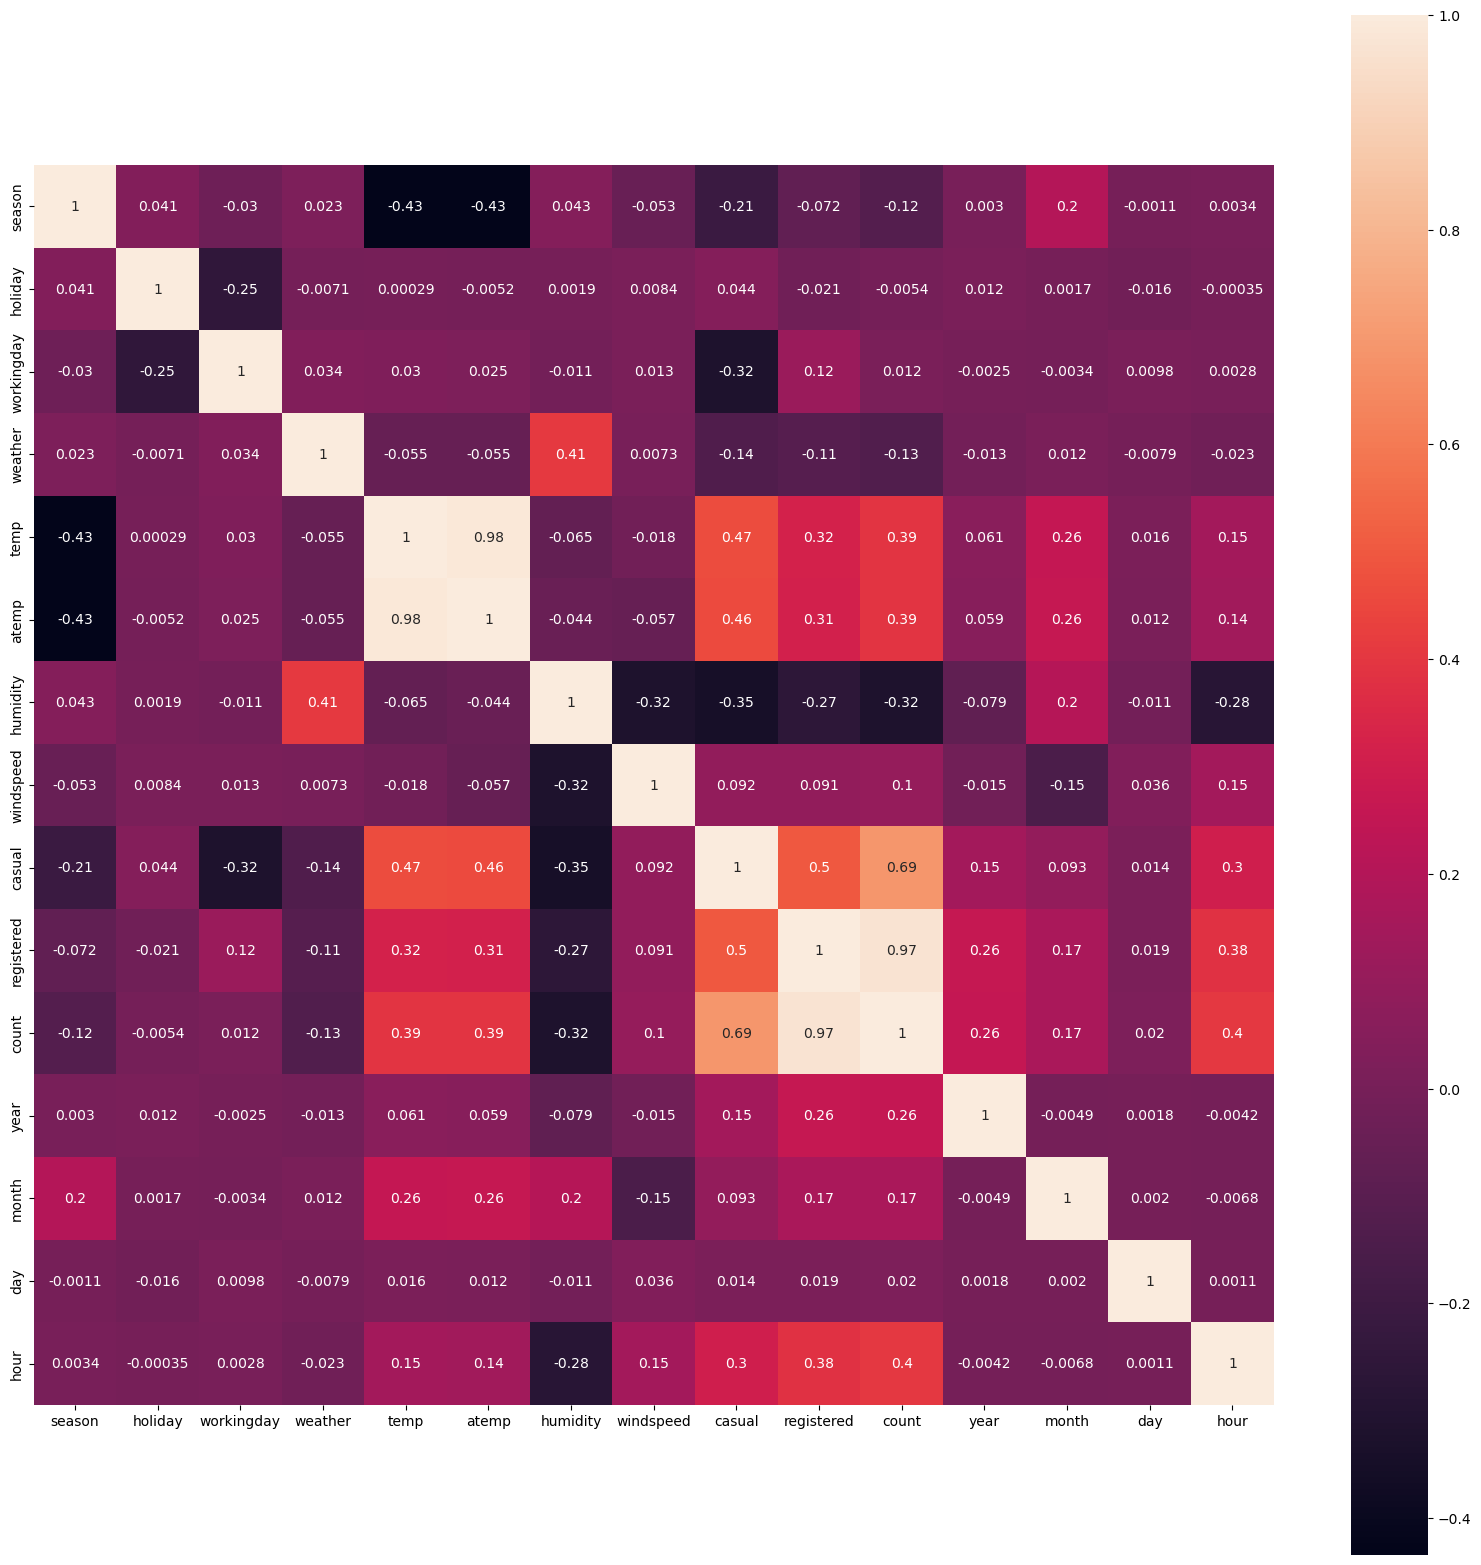

In [108]:
fig=plt.figure(figsize=[20,20])
sns.heatmap(train.corr(), annot=True, square=True)

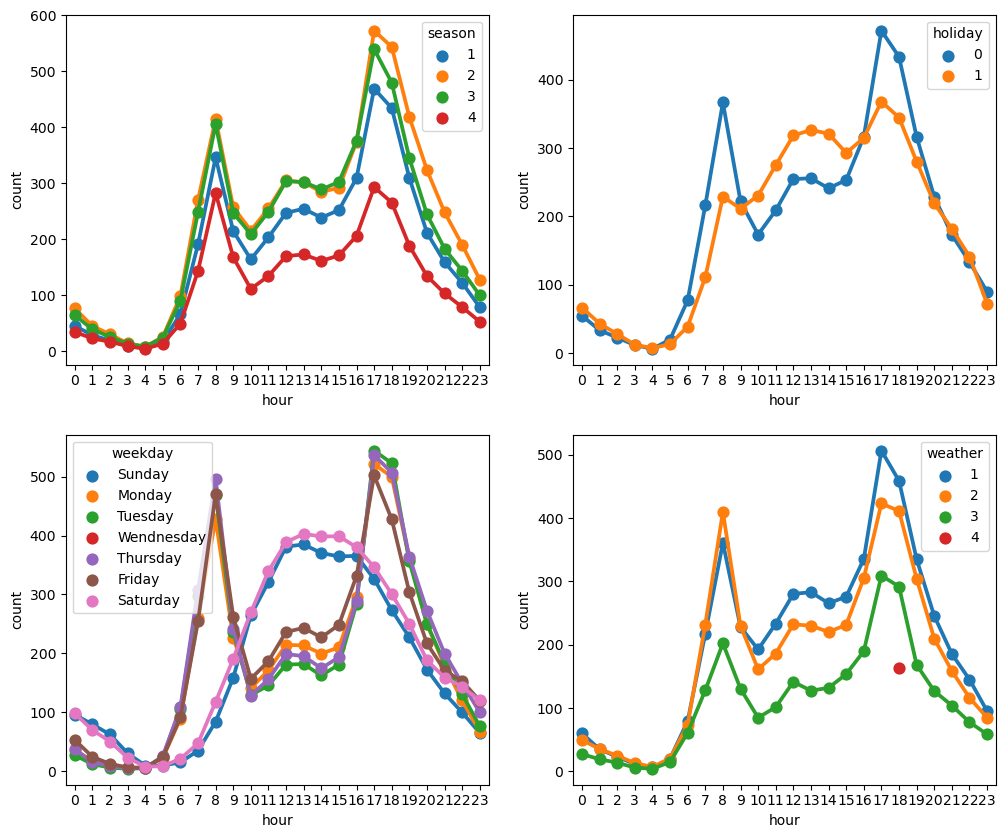

In [109]:
#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [110]:
train[train.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


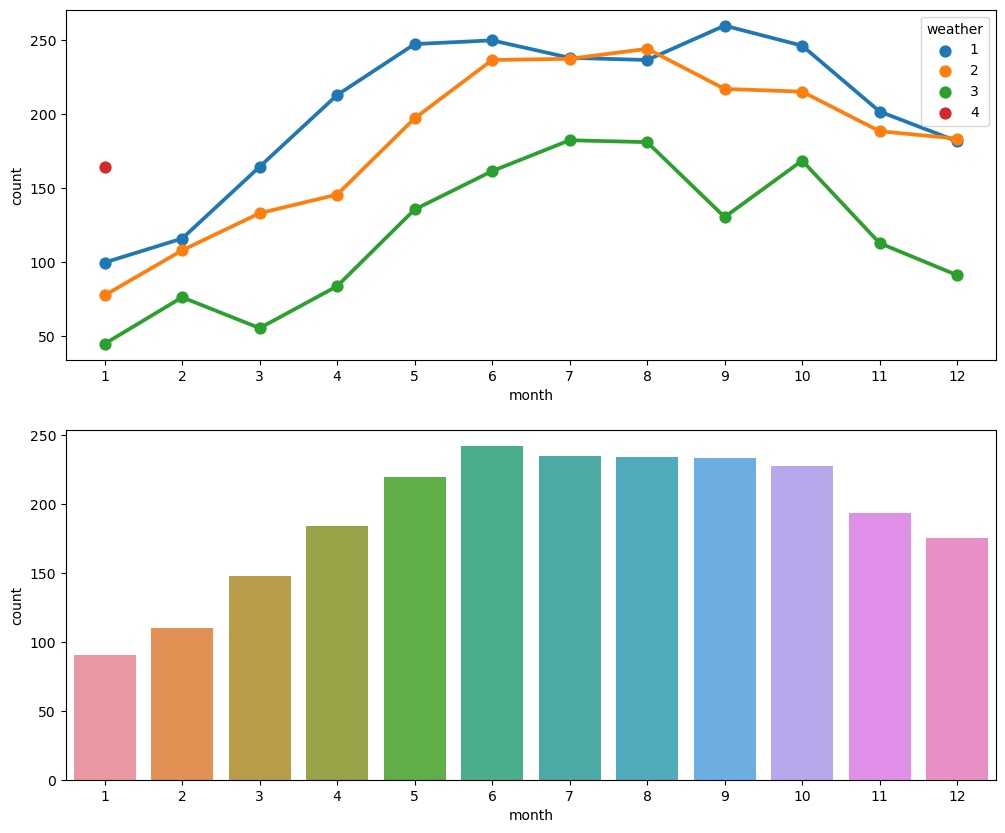

In [111]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())


ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [117]:
train['weekday'] = train.weekday.astype('category')

In [118]:
train['weekday'].cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [119]:
train['weekday'].cat.categories=['5','1','6', '0', '4', '2', '3']

C:\Users\user\AppData\Local\Temp\ipykernel_3536\236765484.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  train['weekday'].cat.categories=['5','1','6', '0', '4', '2', '3']


In [120]:
train['weekday']

0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: category
Categories (7, object): ['5', '1', '6', '0', '4', '2', '3']

In [121]:
"""
풍속이 0이 아닌 값들로 구성된 데이터프에임에서 풍속 예측 모델 생성
-> 풍속이 0인 값들로 구성되 데이터프레임에 대한 풍속을 예측하여 값을 저장
"""
from sklearn.ensemble import RandomForestRegressor #연속형이라서 리그레서


In [122]:
windspeed_0=train[train.windspeed==0]
windspeed_not0=train[train.windspeed!=0]

In [123]:
windspeed_0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [124]:
windspeed_0_df=windspeed_0.drop(['datetime','windspeed','casual','registered','count','holiday','workingday','day','weekday'], axis=1)

In [125]:
windspeed_0_df

,season,weather,temp,atemp,humidity,year,month,hour
0,4,1,9.84,14.395,81,2011,1,0
1,4,1,9.02,13.635,80,2011,1,1
2,4,1,9.02,13.635,80,2011,1,2
3,4,1,9.84,14.395,75,2011,1,3
4,4,1,9.84,14.395,75,2011,1,4
...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,12
10829,4,2,17.22,21.210,88,2012,12,15
10846,4,1,15.58,19.695,94,2012,12,8
10860,4,1,13.94,16.665,49,2012,12,22


In [126]:
windspeed_not0_df=windspeed_not0.drop(['datetime','windspeed','casual','registered','count','holiday','workingday','day','weekday'], axis=1)

In [129]:
windspeed_not0_series=windspeed_not0['windspeed']

In [127]:
windspeed_not0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19
10882,4,1,14.76,17.425,57,2012,12,20
10883,4,1,13.94,15.910,61,2012,12,21
10884,4,1,13.94,17.425,61,2012,12,22


In [ ]:
windspeed_not0_df #입력데이터
windspeed_not0_series #타깃데이터

In [130]:
rf=RandomForestRegressor()

In [131]:
rf.fit(windspeed_not0_df,windspeed_not0_series) # rf.fit(입력데이터,타깃데이터)

RandomForestRegressor()

In [133]:
windspeed_0['windspeed'] = rf.predict(windspeed_0_df)#predict예측하는

C:\Users\user\AppData\Local\Temp\ipykernel_3536\1373831439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0['windspeed'] = rf.predict(windspeed_0_df)#predict예측하는


In [134]:
windspeed_0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.890601,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,8.110629,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,8.360606,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,7.162834,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.797985,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,14.433022,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,11.210552,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,8.211319,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,12.378518,5,127,132,2012,12,18,22,2


In [136]:
train=pd.concat([windspeed_0, windspeed_not0], axis=0)

In [138]:
train[train.windspeed==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday


In [141]:
#train.info()
train.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [145]:
train.datetime=pd.to_datetime(train.datetime)

In [149]:
#train.info()
train=train.sort_values(['datetime'])

In [ ]:
#train.sort_values(['datetime'], ascending=False) #데이트타임열 기준 내림차순 정렬

In [150]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.890601,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,8.110629,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,8.360606,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,7.162834,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.797985,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,2012,12,19,19,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,2012,12,19,20,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,2012,12,19,21,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,2012,12,19,22,3


C:\Users\user\AppData\Local\Temp\ipykernel_3536\2599919693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True, square=True)


<Axes: >

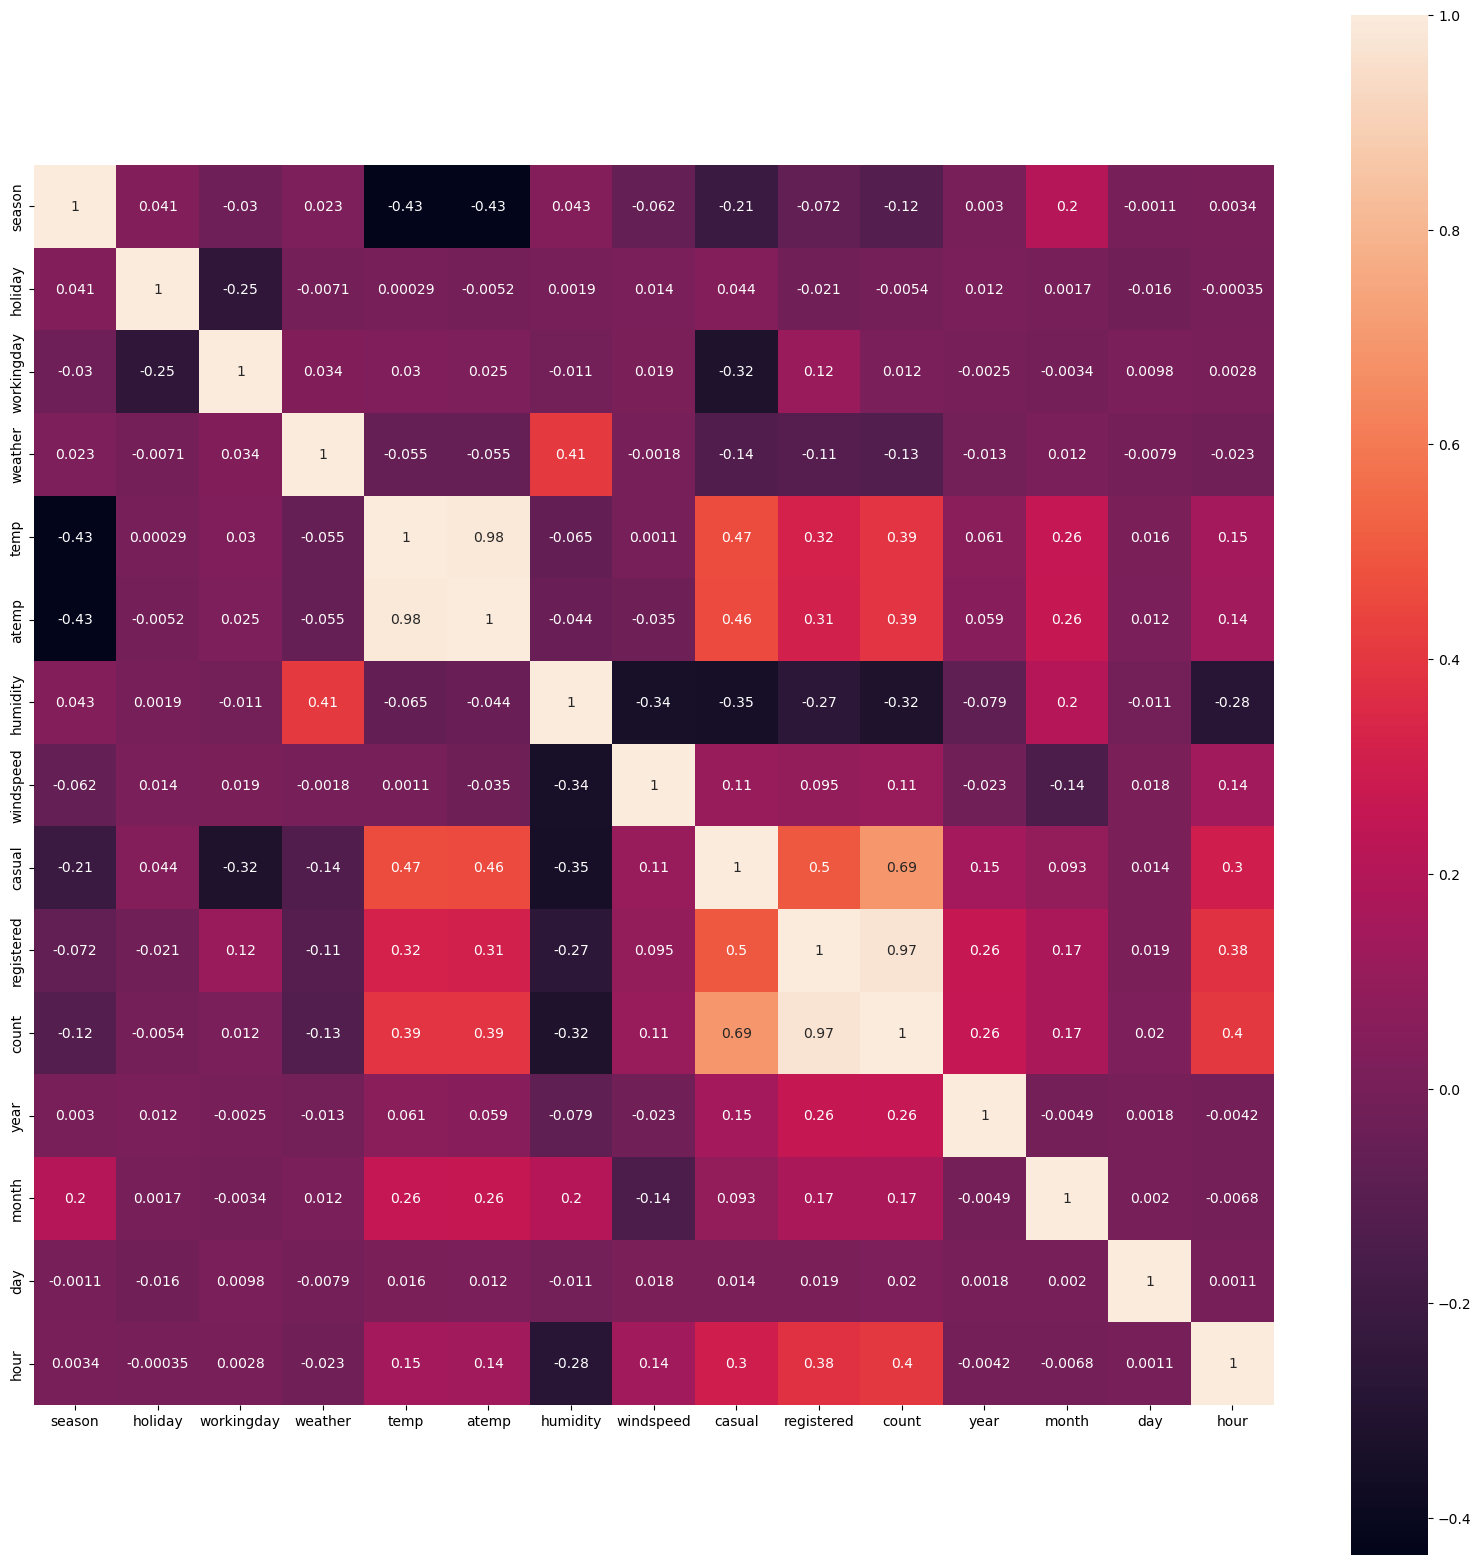

In [152]:
plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True, square=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3536\2520913288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))


<Axes: xlabel='windspeed', ylabel='Density'>

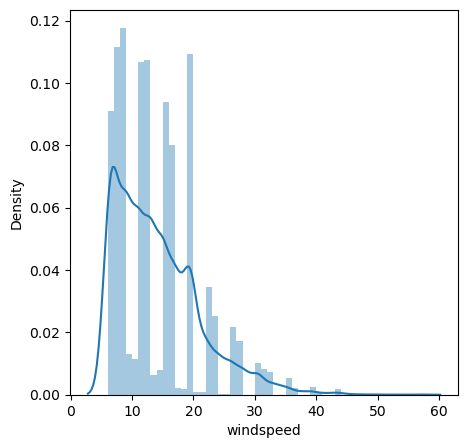

In [153]:
plt.figure(figsize=[5,5])
sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

In [174]:
train=pd.read_csv("bike-sharing-demand/train.csv")
test=pd.read_csv("bike-sharing-demand/test.csv")

In [175]:
combine = pd.concat([train,test],axis=0)

In [176]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [177]:
combine['year'] = pd.to_numeric(combine.year)
combine['month'] = pd.to_numeric(combine.month)
combine['day'] = pd.to_numeric(combine.day)
combine['hour'] = pd.to_numeric(combine.hour)

In [178]:
combine['season']=combine.month.apply(newSeason)

In [179]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [180]:
combine.weekday = combine.weekday.astype('category')

In [181]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

C:\Users\user\AppData\Local\Temp\ipykernel_3536\3864947247.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  combine.weekday.cat.categories = ['5','1','6','0','4','2','3']


In [182]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [183]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [184]:
dataWind0_df=dataWind0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday', 'tempDate'], axis=1)
dataWindNot0_df=dataWindNot0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday','tempDate'], axis=1)

In [185]:
dataWindNot0_series=dataWindNot0['windspeed']

In [186]:
dataWindNot0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
6488,4,2,10.66,12.880,60,2012,12,19
6489,4,2,10.66,12.880,60,2012,12,20
6490,4,1,10.66,12.880,60,2012,12,21
6491,4,1,10.66,13.635,56,2012,12,22


In [187]:
rf2=RandomForestRegressor()
rf2.fit(dataWindNot0_df, dataWindNot0_series)

RandomForestRegressor()

In [188]:
pred=rf2.predict(dataWind0_df)
pred

array([ 6.4678785,  6.2479175,  6.2079855, ...,  7.421925 , 23.19004  ,
        7.681081 ])

In [189]:
dataWind0["windspeed"] = pred

C:\Users\user\AppData\Local\Temp\ipykernel_3536\2147140242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWind0["windspeed"] = pred


In [190]:
dataWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,6.467878,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",6,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.247917,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",6,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.207985,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",6,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.198002,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",6,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.183028,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",6,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,7.692337,NaN,NaN,NaN,"[2012-12-29, 12:00:00]",6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.182375,NaN,NaN,NaN,"[2012-12-29, 13:00:00]",6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,7.421925,NaN,NaN,NaN,"[2012-12-29, 15:00:00]",6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,23.190040,NaN,NaN,NaN,"[2012-12-29, 23:00:00]",6,2012,12,29,23


In [191]:
dataWindNot0
combine=pd.concat([dataWindNot0, dataWind0], axis=0)

In [195]:
combine.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [196]:
combine

cate_cols=['season','weather','weekday','year','month','hour']
drop_cols=['datetime','casual','registered','count','tempDate','day']

In [198]:
for col in cate_cols:
    combine[col]=combine[col].astype('category')

In [ ]:
test=combine[~pd.notnull(combine['count'])].sort_values("datetime")
test

In [211]:
combine['month']
train=combine[pd.notnull(combine['count'])].sort_values("datetime")
train

ylabel=train['count']
datetimecol=test['datetime']

In [210]:
# test=combine[~pd.notnull(combine['count'])].sort_values("datetime")
# test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,"[2011-01-20, 00:00:00]",4,2011,1,20,0
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,9.068986,NaN,NaN,NaN,"[2011-01-20, 01:00:00]",4,2011,1,20,1
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,9.029188,NaN,NaN,NaN,"[2011-01-20, 02:00:00]",4,2011,1,20,2
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 03:00:00]",4,2011,1,20,3
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 04:00:00]",4,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 19:00:00]",1,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 20:00:00]",1,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 21:00:00]",1,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,"[2012-12-31, 22:00:00]",1,2012,12,31,22


In [212]:
drop_cols
train=train.drop(drop_cols, axis=1)
test=test.drop(drop_cols, axis=1)

In [207]:
train.head() #12개열
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekday,year,month,hour
0,4,0,1,1,10.66,11.365,56,26.002700,4,2011,1,0
1,4,0,1,1,10.66,13.635,56,9.068986,4,2011,1,1
2,4,0,1,1,10.66,13.635,56,9.029188,4,2011,1,2
3,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,3
4,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,4


In [215]:
train
test
ylabel

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 10886, dtype: float64

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   weekday     10886 non-null  category
 9   year        10886 non-null  category
 10  month       10886 non-null  category
 11  hour        10886 non-null  category
dtypes: category(6), float64(3), int64(3)
memory usage: 661.1 KB


In [193]:
#combine['season'].astype('category') #카테고리 타입- 종류에 해당하는것들을 말함

5       4
10      4
11      4
12      4
13      4
       ..
6433    4
6434    4
6436    4
6444    4
6464    4
Name: season, Length: 17379, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [219]:
rf=RandomForestRegressor() #리그레서는 평균을 메긴다
rf_params={'n_estimators':[10, 30, 50, 70, 100, 200]} #트리의 개수가 중요하다

In [222]:
grid_cf=GridSearchCV(rf, rf_params, scoring='neg_mean_squared_log_error', cv=5)

In [223]:
grid_cf.fit(train, ylabel)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 30, 50, 70, 100, 200]},
             scoring='neg_mean_squared_log_error')

In [226]:
grid_cf.predict(test)

array([ 10.76666667,   5.2       ,   4.7       , ..., 170.9       ,
       125.16666667,  71.4       ])

In [225]:
grid_cf.predict(train)

array([ 19.8       ,  34.93333333,  29.03333333, ..., 174.96666667,
       141.9       ,  86.2       ])

In [231]:
mysubmission=pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
mysubmission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [232]:
mysubmission['count']=grid_cf.predict(test)

In [233]:
mysubmission.to_csv("mysubmission.csv", index=False)
#0.48

In [238]:
from sklearn.ensemble import GradientBoostingRegressor

In [241]:
gb = GradientBoostingRegressor()

In [246]:
gb_params={'max_depth':range(3,21,2),'n_estimators':[1,50,100, 200]}
grid_gb=GridSearchCV(gb,gb_params,scoring='neg_mean_squared_log_error',cv=5)
grid_gb.fit(train,ylabel)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(3, 21, 2),
                         'n_estimators': [1, 50, 100, 200]},
             scoring='neg_mean_squared_log_error')

In [247]:
preds = grid_gb.predict(test)

In [248]:
mysubmission['count']=preds
mysubmission.to_csv("mysubmission_grdientboosting.csv", index=False)

In [229]:
pd.read_csv("bike-sharing-demand/test.csv")['datetime']

0       2011-01-20 00:00:00
1       2011-01-20 01:00:00
2       2011-01-20 02:00:00
3       2011-01-20 03:00:00
4       2011-01-20 04:00:00
               ...         
6488    2012-12-31 19:00:00
6489    2012-12-31 20:00:00
6490    2012-12-31 21:00:00
6491    2012-12-31 22:00:00
6492    2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: object

In [228]:
pd.read_csv("bike-sharing-demand/train.csv")['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [194]:
pd.get_dummies(combine['season'])

,1,2,3,4
5,0,0,0,1
10,0,0,0,1
11,0,0,0,1
12,0,0,0,1
13,0,0,0,1
...,...,...,...,...
6433,0,0,0,1
6434,0,0,0,1
6436,0,0,0,1
6444,0,0,0,1


In [ ]:
"""
데이터타입: 수치형, 범주형
수치형: 연속형(실수), 이산형(1,2,3..정수,딱 끊어지는수)
범주형(종류,여러개로 나누어져있는): 명목형(순서가없는것, 혈액형,색깔 등), 순서형(1월~12월,봄~겨울,학점)
get_dummies 쓰는이유 원핫인코딩하려고, 원핫인코딩 하는이유 범주형으로 나타내겠다, 
범주형으로하는이유 봄+가을이 안되게 하려고 수치형이 아닌 종류형으로해줘야함
수치형으로하게되면 봄+여름=? 말도안되게 되어버림
"""